### Dimensionality reduction with MNIST Dataset and Autoencoder
This script sets up a Autoencoder to perform dimensionality reduction on the MNIST dataset.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


Use a Keras utility function to load the MNIST dataset.  We select only zeros and ones to do binary classification.

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

Resize the images to vectors and convert their datatype and range.

In [3]:
x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build an auto-encoder model.

In [4]:
model = Sequential()
model.add(Dense(500,activation='sigmoid',input_shape=(784,)))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(500,activation='sigmoid'))
model.add(Dense(784,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1002      
_________________________________________________________________
dense_3 (Dense)              (None, 500)               1500      
_________________________________________________________________
dense_4 (Dense)              (None, 784)               392784    
Total params: 787,786
Trainable params: 787,786
Non-trainable params: 0
_________________________________________________________________


Set up the model to optimize the binary crossentropy loss using stochastic gradient descent.

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd')

Optimize the model over the training data.

In [ ]:
history = model.fit(x_train, x_train,
                    batch_size=100,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, x_test))

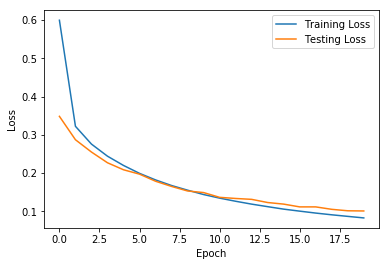

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Testing Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

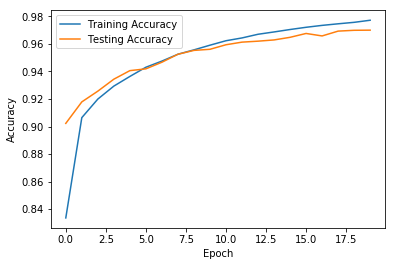

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Test the autoencoder on images from the test set.